## Seaborn and Statistical Data Visualization

In the course thus far, we've focused mainly on using `matplotlib` as a tool for plotting and visualizing data. However, Python includes many other plotting packages that have distinct or complementary features to what is available in the standard `matplotlib` modules. One of the most powerful such packages is called `seaborn`, which is particularly good at performing statistical analysis and visualization of complex datasets. Most of its features integrate nicely with `pandas` `DataFrames`. Today's lectures will cover just the basics, and was adapted from the excellent tutorial and documentation on the `seaborn` website: http://seaborn.pydata.org/.

* Note, the `seaborn` and `matplotlib` packages were recently updated. If you are having trouble running this notebook, your versions may be out of date. You can update individual packages using mamba / conda / Anaconda Navigator (e.g. in a terminal, `conda update seaborn`).


In [22]:
# We'll use the following packages today
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Figure Styles

Like `matplotlib`, `seaborn` includes a number of built-in figure styles. It's up to you to chose which one you prefer to display your data.  

In [23]:
# Test data to plot
x = np.linspace(0, 10, 1001)
y1 = 1 * np.sin(x)
y2 = 2 * np.cos(1.5*x)
y3 = 1.5 * np.sin(x/3)*np.cos(x/3)

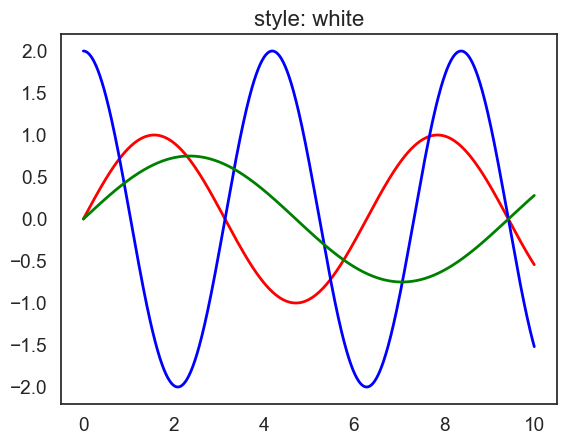

In [24]:
# white
sns.set_style("white")
plt.plot(x, y1, "-r")
plt.plot(x, y2, '-b')
plt.plot(x, y3, '-g')
plt.title("style: white", fontsize=16);

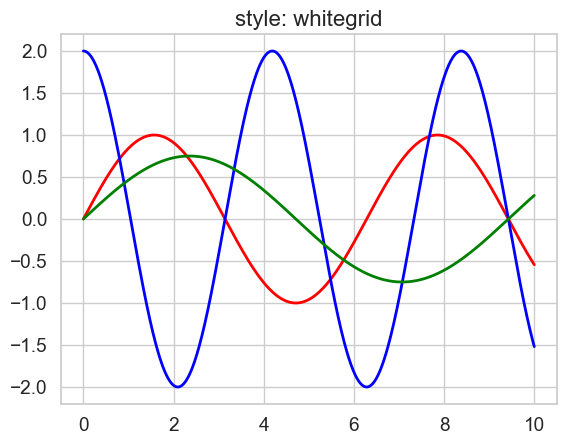

In [25]:
# whitegrid
sns.set_style("whitegrid")
plt.plot(x, y1, "-r")
plt.plot(x, y2, '-b')
plt.plot(x, y3, '-g')
plt.title("style: whitegrid", fontsize=16);

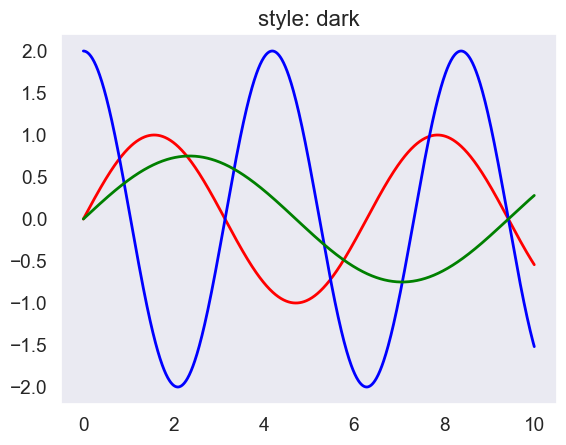

In [26]:
# dark
sns.set_style("dark")
plt.plot(x, y1, "-r")
plt.plot(x, y2, '-b')
plt.plot(x, y3, '-g')
plt.title("style: dark", fontsize= 16);

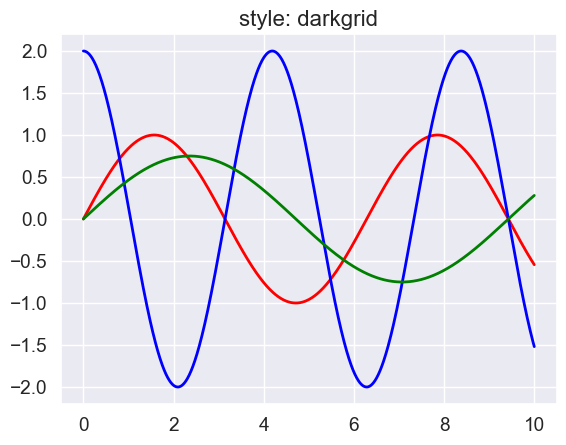

In [27]:
# darkgrid
sns.set_style("darkgrid")
plt.plot(x, y1, "-r")
plt.plot(x, y2, '-b')
plt.plot(x, y3, '-g')
plt.title("style: darkgrid", fontsize= 16);

One can also change the context to :"notebook" (default), "talk", "paper", or "poster". This changes the default text sizes and linewidths. 

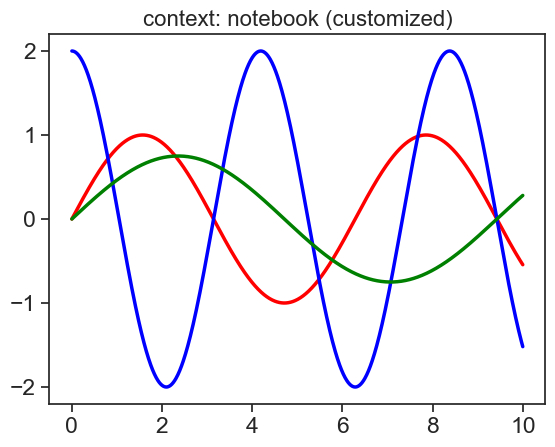

In [28]:
# customized notebook
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("ticks")
plt.plot(x, y1, "-r")
plt.plot(x, y2, '-b')
plt.plot(x, y3, '-g')
plt.title("context: notebook (customized)", fontsize=16);

#### To reset to defaults:


In [29]:
sns.set_style()
sns.set_context()

### Scatter Plots and Regression Analysis

Scatter plots are a useful way to visualize the relation between two variables. In a nutshell, we plot data as x and y points, though often we want to do something more elaborate with this basic plot afterward.

Seaborn contains many built-in datasets that we can play around with. Here is a dataset related to restaurant tips. We use `load_dataset(...)` to get the data as a pandas `DataFrame`.

In [30]:
# Load data
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [31]:
# Set defaults for plotting
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.0})


#### Figure versus axis-level plots

**Aside:** `seaborn` plots come in two basic types: those that operate at the "Figure" level and those that operate at the "Axis" level. Figure-level functions control the entire figure, including all subplots. Axis-level functions control only the individual axes within a subplot. So you can create a complex figure with multiple Axis-level functions, but can only have one Figure-level function at a time. 

The distinction between Figure-level and Axis-level functions takes some getting used to, so don't worry about it too much for now. This is analagous to `matplotlib`, where it is possible to do many things at either the figure level or axis level, the latter using subplots for example.

---

Here, will use a `relplot()`, which is used to visualize relationships between data. `relplots` are Figure-level plots and return `FacetGrids`, which are basically subplots that can be further customized.

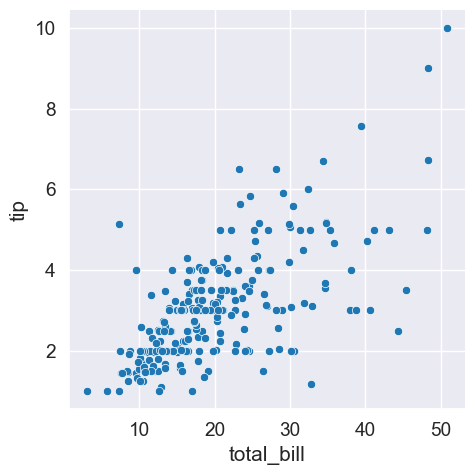

In [32]:
# Make a simple plot of our data
sns.relplot(x="total_bill", y="tip",data=df);


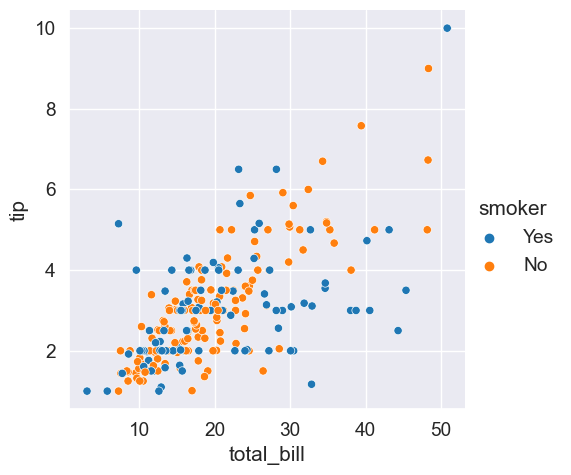

In [33]:
# Color code by "smoker"
sns.relplot(x="total_bill", y="tip", hue="smoker", data=df);

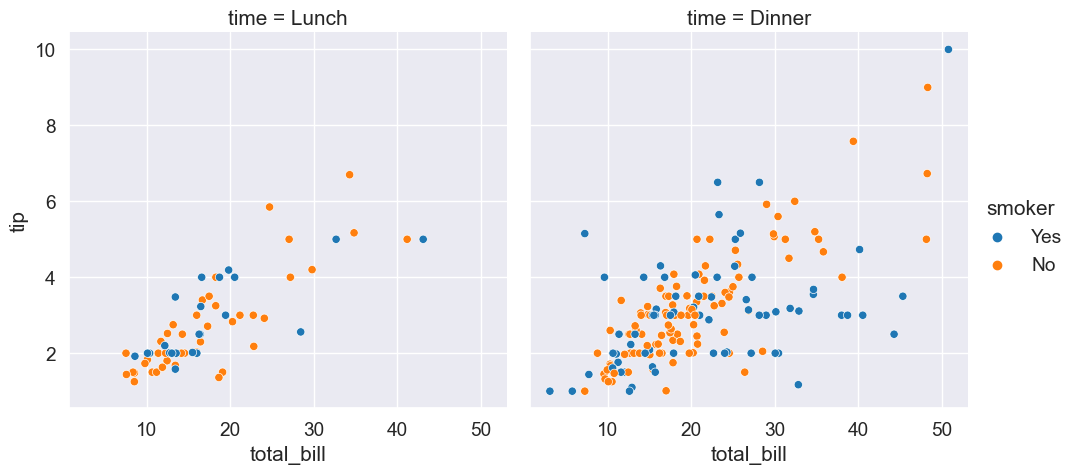

In [34]:
# 1 x 2 FacetGrid, color-coded by smoker and broken out by time
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", data=df);


### Regression Analyses

`seaborn` has lot's of neat tools for fitting linear models to data and visualizing the results. `regplot(...)` and `lmplot(...)` are Figure and Axis-level functions to do this.

Notice in the plot below, there is a shading around the best fit line. This can be turned off, but gives a measure of uncertainty in the fit. Though beyond the scope of this class, the confidence interval comes from a powerful statistical technique called bootstrapping.

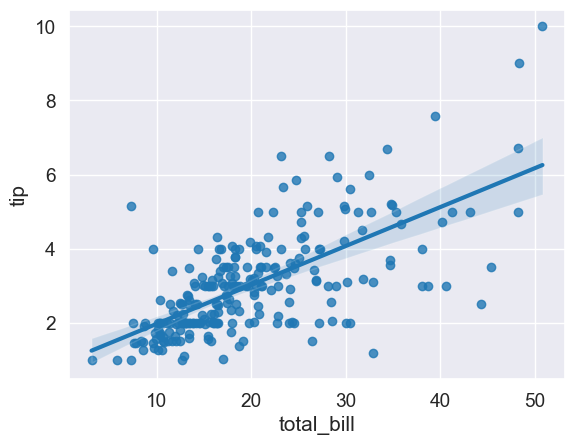

In [35]:
# Linear regression
sns.regplot(x="total_bill", y="tip", data=df);

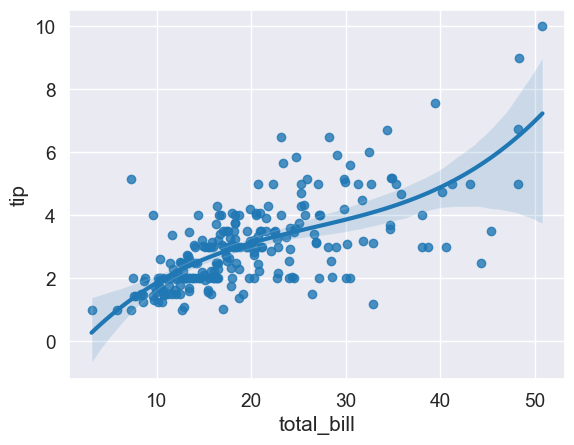

In [36]:
# Linear model, 3-order polynomial
sns.regplot(x="total_bill", y="tip", order=3, data=df);

/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


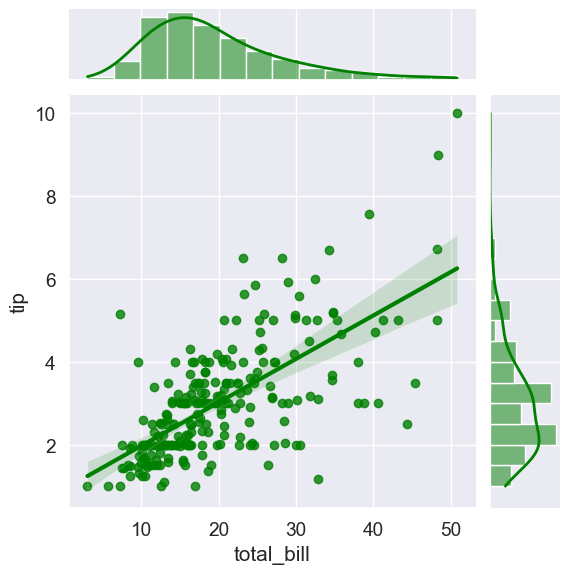

In [37]:
# We can also make fancy jointplots and customize
sns.jointplot(x="total_bill", y="tip", data=df, color="green", kind="reg");

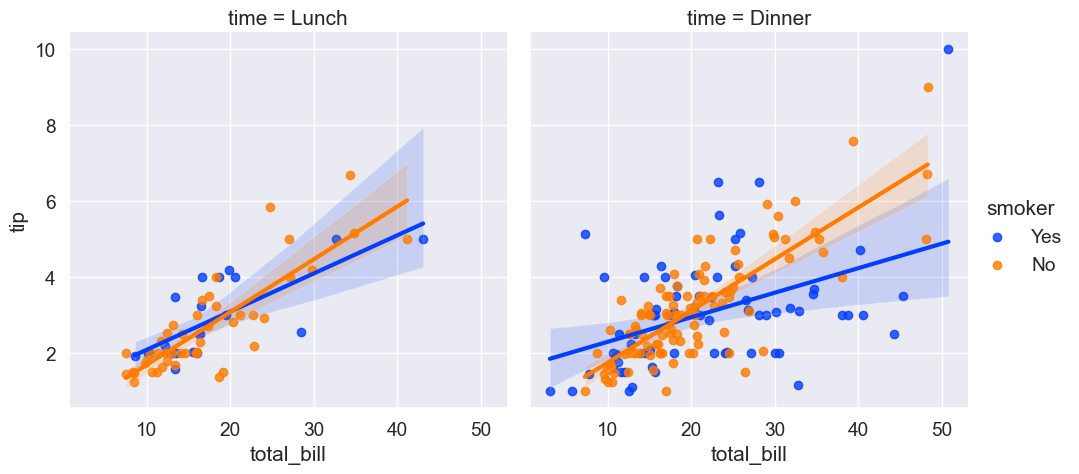

In [38]:
# We can plot multiple lines and multiple subplots
#  note that "palettes" control color schemes in seaborn
sns.lmplot(x="total_bill", y="tip", hue="smoker", 
           col="time", palette="bright", data=df);

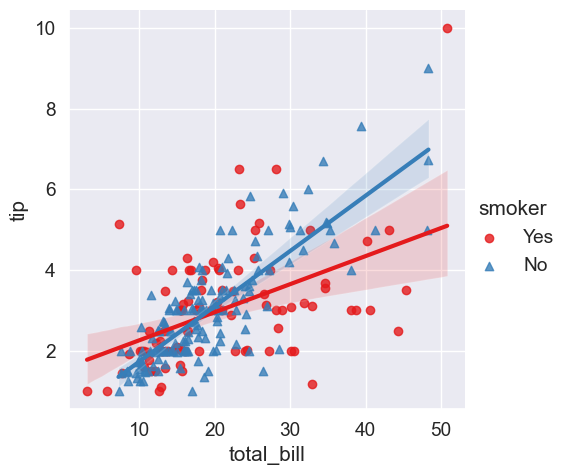

In [39]:
# More customization
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=df,
           markers=["o", "^"], palette="Set1");

#### Robust regression

Often times in science (and other fields), we have to deal with noisy data containing numerous outliers or where the errors are otherwise not normally distributed. Robust regression can be useful in these circumstances. 

In [40]:
# Load a simple test dataset with outliers
df = sns.load_dataset("anscombe").query("dataset == 'III'")
df

,dataset,x,y
22,III,10.0,7.46
23,III,8.0,6.77
24,III,13.0,12.74
25,III,9.0,7.11
26,III,11.0,7.81
27,III,14.0,8.84
28,III,6.0,6.08
29,III,4.0,5.39
30,III,12.0,8.15
31,III,7.0,6.42


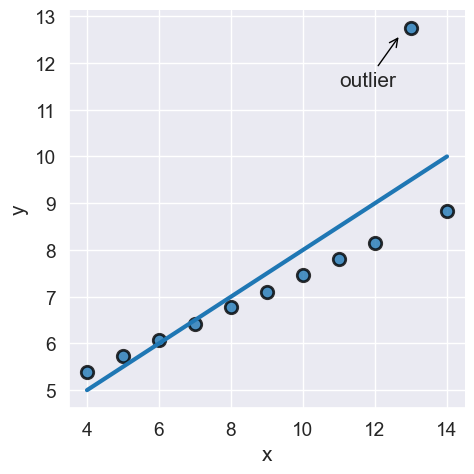

In [41]:
# Plot the results of a standard linear fit
g = sns.lmplot(x="x",y="y",data=df, ci=None,
        scatter_kws={"s": 80,"edgecolor": "k", "linewidths": 2})

# annotate the outlier
g.ax.annotate(text="outlier", xy=(12.7,12.6), xytext=(11,11.5),
              arrowprops={"arrowstyle":'->', "color": "k"});

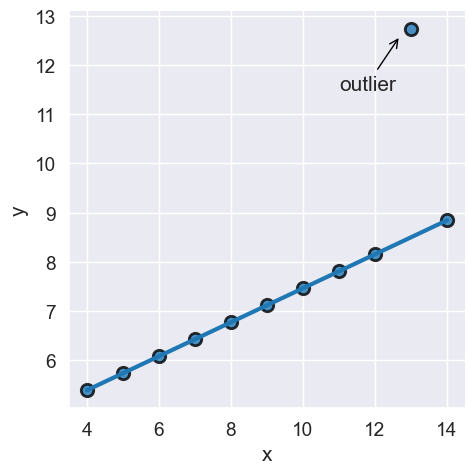

In [42]:
# Robust regression
g = sns.lmplot(x="x", y="y", data=df, robust=True, ci=None,
    scatter_kws={"s": 80,"edgecolor": "k", "linewidths": 2})

# Outlier doesn't affect the fit
g.ax.annotate(text="outlier", xy=(12.7,12.6), xytext=(11,11.5),
              arrowprops={"arrowstyle":'->', "color": "k"});

### Visualizing Distributions of Data

Sometimes we just want to visualize our data, not fit lines. 

In [43]:
# Yes, penguins
df = sns.load_dataset("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


#### Histogram-like plots for 1D data

/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


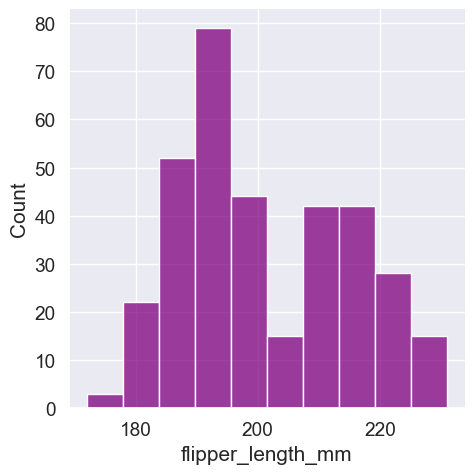

In [44]:
# A simple histogram
sns.displot(df,x="flipper_length_mm", color="purple");

/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


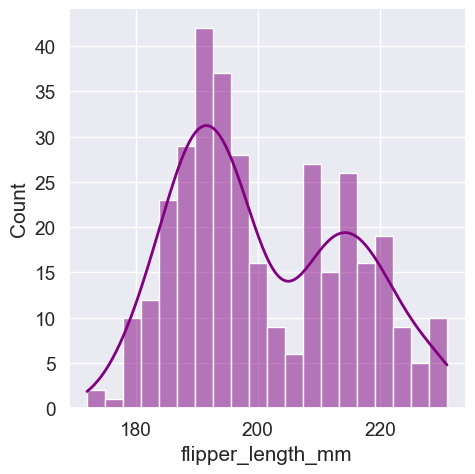

In [45]:
# KDE = kernel density estimate
# --> fits a smooth distribution to the histogram
sns.displot(df, x="flipper_length_mm", color="purple", bins=20, kde=True);

/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


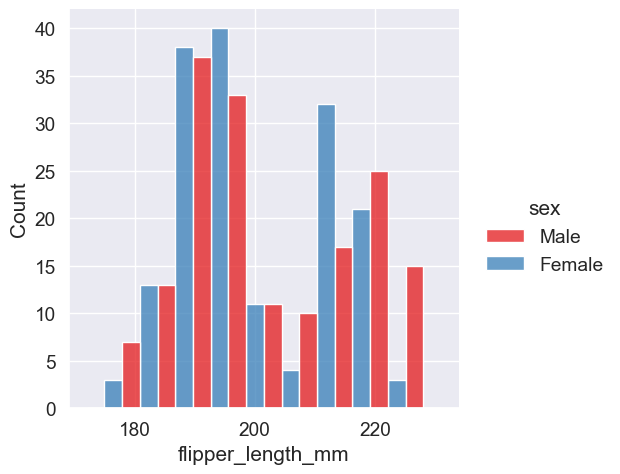

In [46]:
# Side-by-side histograms
sns.displot(df, x="flipper_length_mm", hue="sex", multiple="dodge", palette="Set1");

#### Visualizing data in 2D

/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


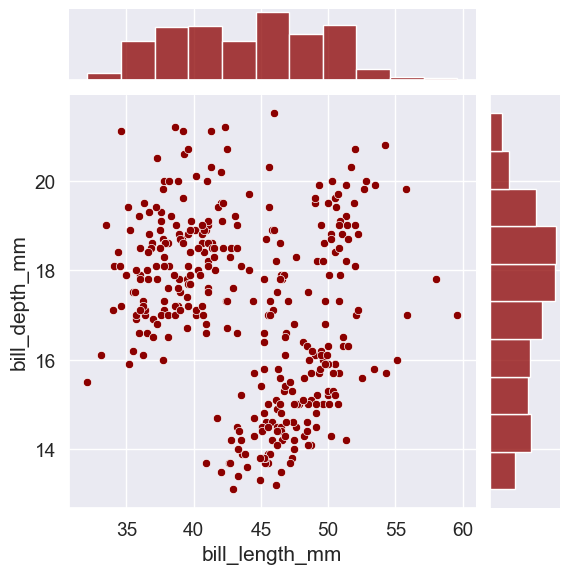

In [47]:
# Scatter plot in 2D
sns.jointplot(data=df, x="bill_length_mm", y="bill_depth_mm", color="darkred");

/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


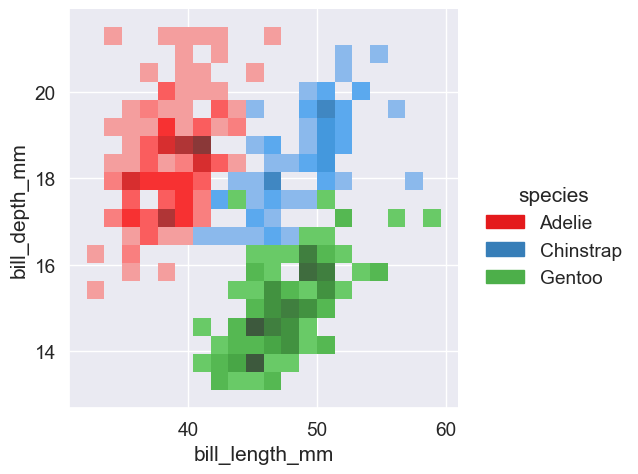

In [48]:
# 2D histogram, color-coded by species
sns.displot(df, x="bill_length_mm", y="bill_depth_mm",
            hue="species", kind="hist", palette="Set1",bins=(20,20));

/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


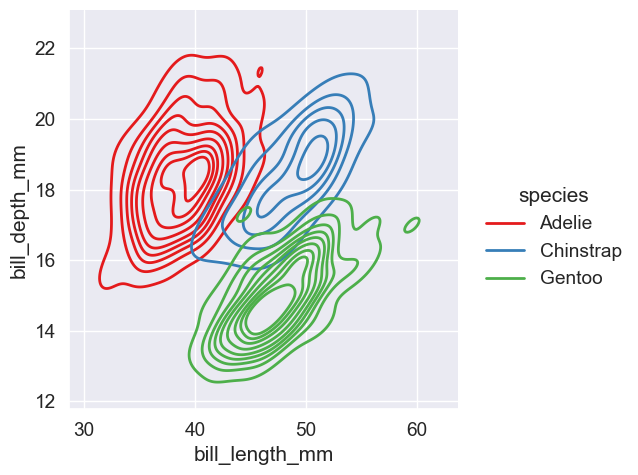

In [49]:
# 2D KDE, color-coded by species
sns.displot(df, x="bill_length_mm", y="bill_depth_mm",
            hue="species", kind="kde", palette="Set1");

#### `PairGrids`

`PairGrids` are really nice for visualizing pairwise relationships between different variables. These plots show a 2D grid of all pairwise relationships in a `DataFrame`. You can customize how each grid cell is displayed.

/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/_oldcor

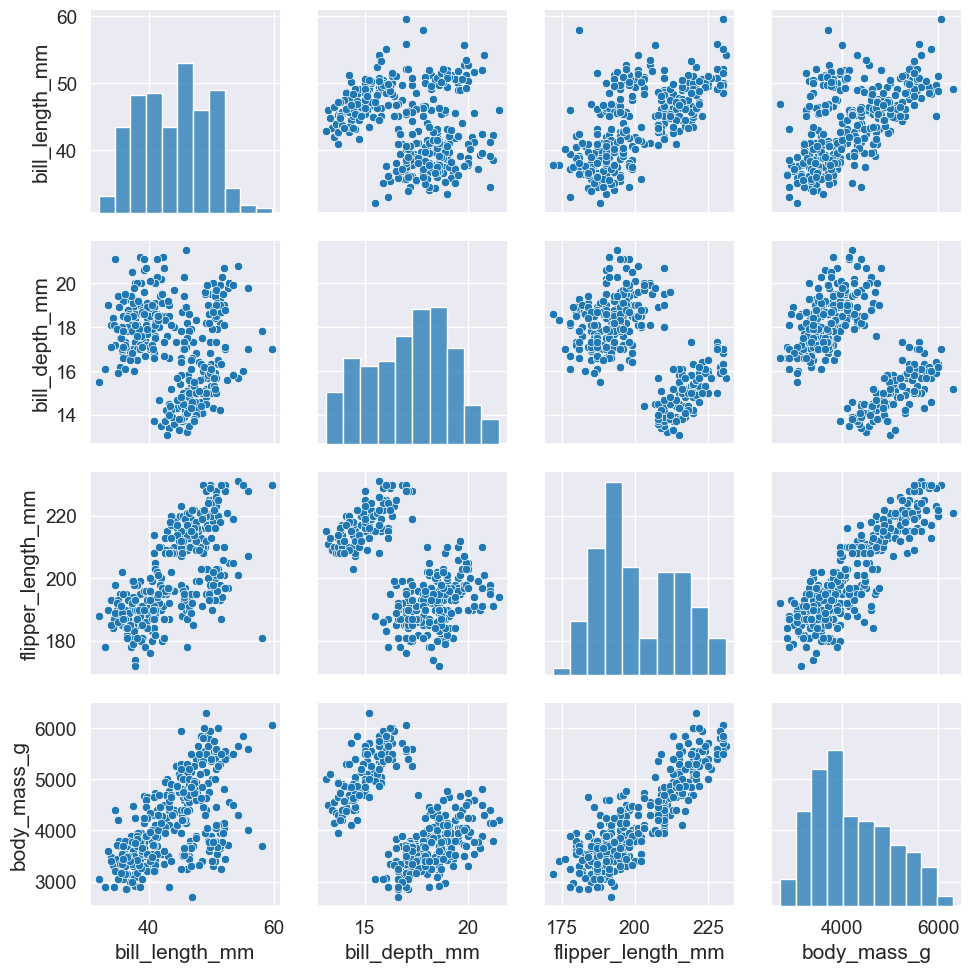

In [50]:
# Basic PairGrid
g = sns.PairGrid(df) # initialize a blank grid
g.map_diag(sns.histplot) # put a histogram on the diagonal
g.map_offdiag(sns.scatterplot); # put scatterplots on the off-diagonals

/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/_oldcor

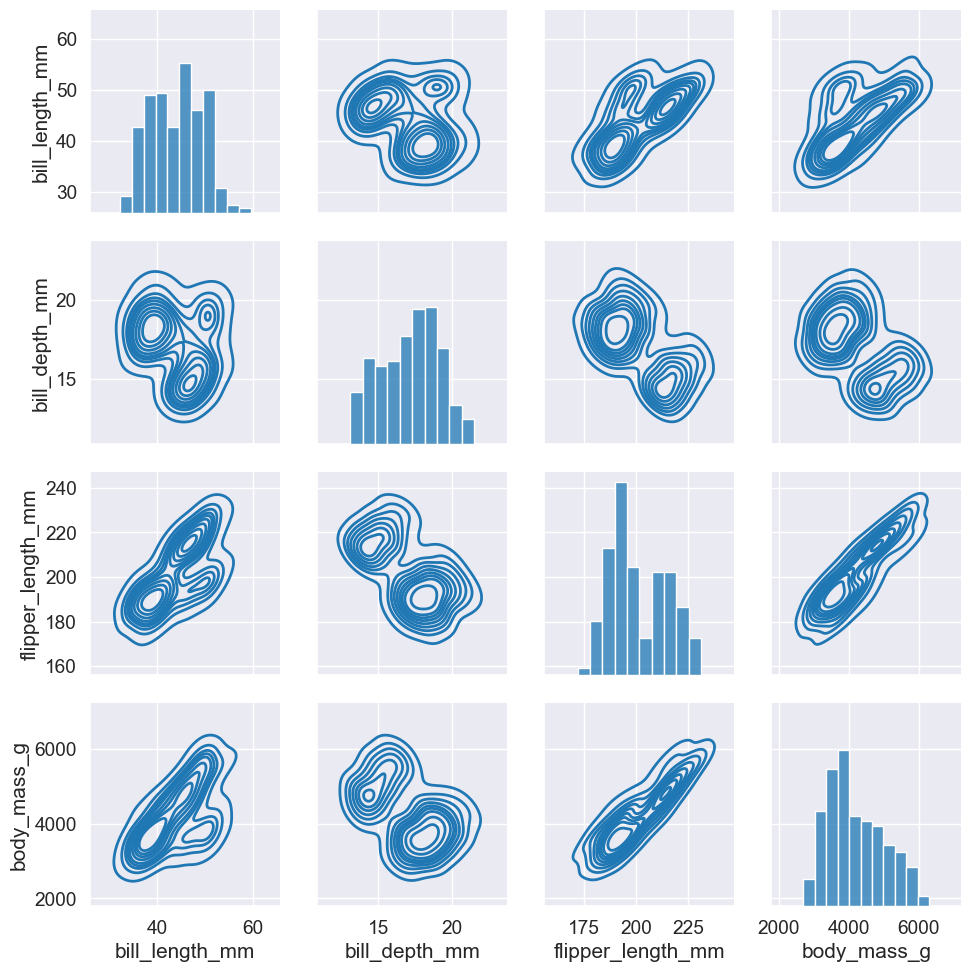

In [51]:
# More advanced. 
g = sns.PairGrid(df) # Initialize
g.map_diag(sns.histplot) # histogram on diagonal
g.map_offdiag(sns.kdeplot, fill=False); # kde on the off-diagonal

/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/_oldcor

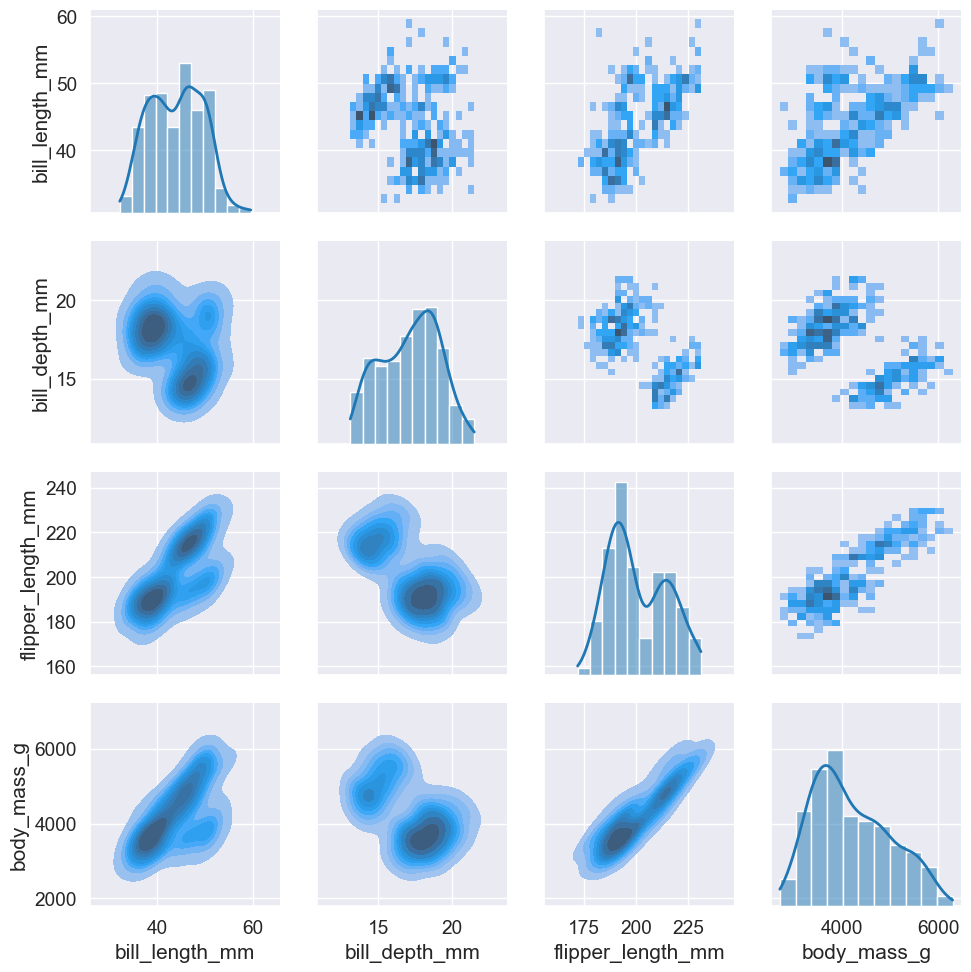

In [52]:
# Note you can control the upper and lower off-diagonals separately
g = sns.PairGrid(df)
g.map_diag(sns.histplot, kde=True)
g.map_upper(sns.histplot, bins=(20,20))
g.map_lower(sns.kdeplot, fill=True);


### Quantifying Categorical Data

Often our datasets include multiple categories, for example data collected at different sites on in different seasons. What to do?

Again, `seaborn` has many tools for this. `catplot(...)` in particular has many options for customization.

In [53]:
# Load the tips data again
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### `catplot`

/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


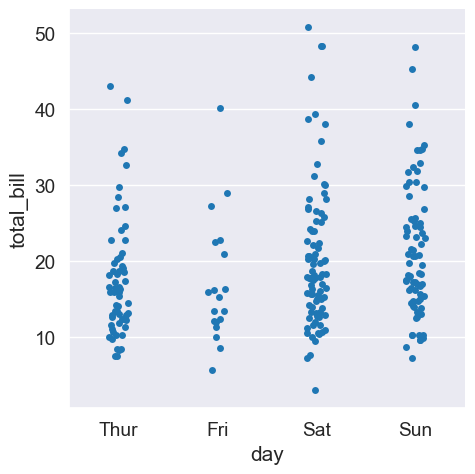

In [54]:
# Simple plot by day of the week
sns.catplot(x="day", y="total_bill", data=df);

/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


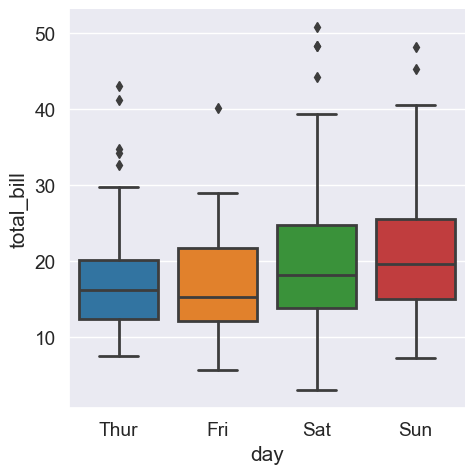

In [55]:
# These types of distributions are commonly displayed as boxplots
sns.catplot(x="day", y="total_bill", kind="box", data=df);

/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


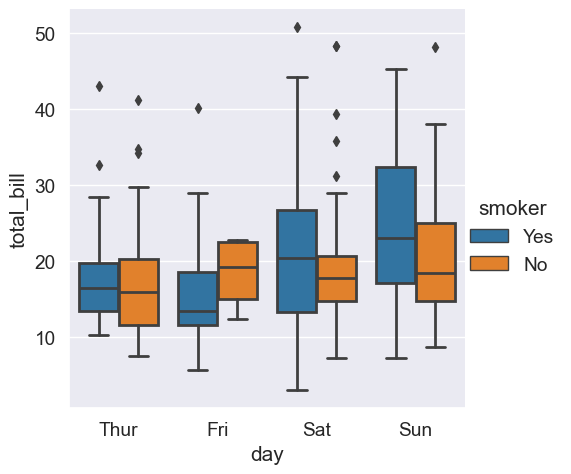

In [56]:
# Color-code by smoker status
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=df);

/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


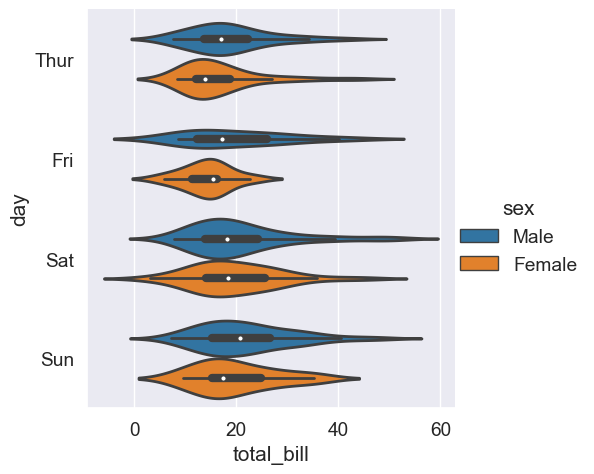

In [57]:
# Violin plots are "fancy" boxplots that use width
#  to show the distribution of data
sns.catplot(x="total_bill", y="day", hue="sex",kind="violin", data=df);

#### Adjusting axis labels

We can use `matplotlib` or `seaborn` commands to do this.

/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


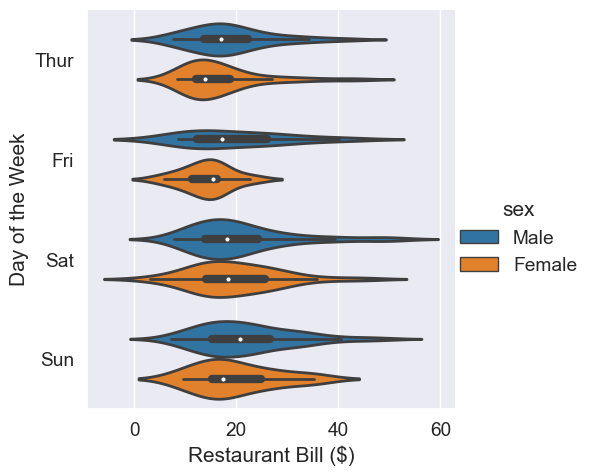

In [58]:
# using matplotlib
sns.catplot(x="total_bill", y="day", hue="sex", kind="violin", data=df)
plt.xlabel("Restaurant Bill ($)")
plt.ylabel("Day of the Week");


/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/griffinshelor/miniforge3/envs/pyclass24new/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


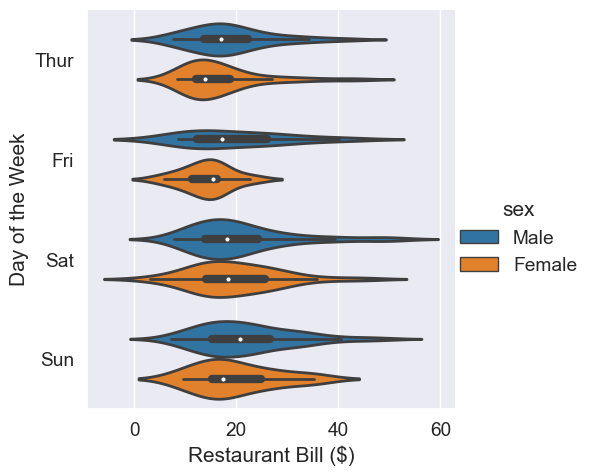

In [59]:
# using seaborn
ax = sns.catplot(x="total_bill", y="day", hue="sex", kind="violin", data=df)
ax.set(xlabel="Restaurant Bill ($)", ylabel="Day of the Week");

### Turning Tables into Heatmaps

Many scientific papers include tables to show numerical data. However, if these tables show actual scientific results (as opposed to experimental or model parameters), it is often easier to understand them with a heatmap than a numerical tabulation.

Consider the following example.

In [60]:
# Load the example flights dataset
flights_long = sns.load_dataset("flights")
flights_long

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [61]:
#  Pivot is a pandas command to reshape the table, with new indices and columns
flights = flights_long.pivot(index="month", columns="year", values="passengers")
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


This would be a very tedious table to include in a manuscript. We can see the actual pattern better as `heatmap`.

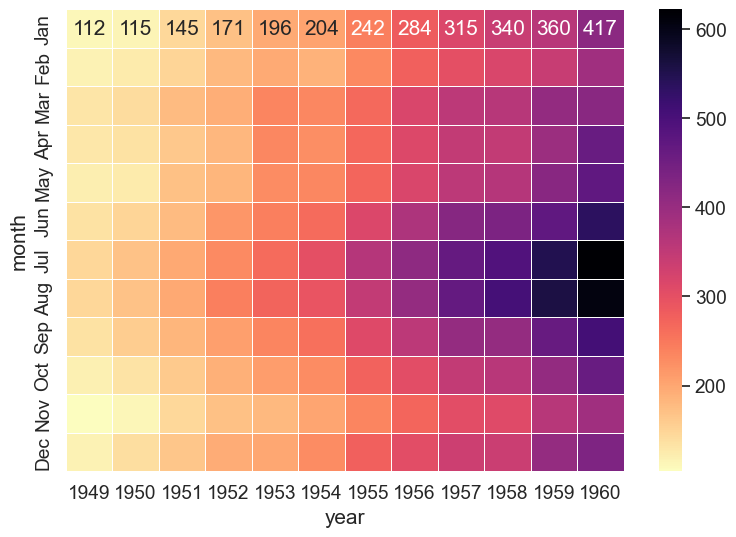

In [62]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="magma_r");

# Summary
* `seaborn` includes many useful functions for scientific and statistical data visualization
* Scatter plots and regression analysis can help us understand relations between variables: `relplot`, `regplot`, `lmplot`.
* Histograms and kernel density estimates help us visualize the underlying statistical distributions: `displot`  
* `PairPlot` is handy to see all pairwise relations in a dataset.
* Boxplots and Violinplots are used with categorical data: `catplot`
* `heatmaps` can be used to replace tables in certain contexts